
# Stacked Regressions to predict House Prices

In [1]:
# importing the necessary files

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette() # Return a list of colors defining a color palette
sns.set_style('darkgrid')


from scipy import stats
from scipy.stats import norm,skew


In [34]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [35]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# EXPLORATORY DATA ANALYSIS

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [38]:
# Descriptive statistics
# describing the numerical features
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [39]:
# describing the categorial features
train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [40]:
# checking the number of samples and features
print('shape of train data before droping ID {}'.format(train.shape))
print('shape of test data before droping ID {}'.format(test.shape))

# Id coloumn is unecessary for prediction so we drop it
train.drop('Id',axis=1,inplace=True)
test_id=test['Id']
test.drop('Id',axis=1,inplace=True)

# shape of data after dropping ID column
print('\n')
print('shape of train data after droping ID {}'.format(train.shape))
print('shape of test data after droping ID {}'.format(test.shape))

shape of train data before droping ID (1460, 81)
shape of test data before droping ID (1459, 80)


shape of train data after droping ID (1460, 80)
shape of test data after droping ID (1459, 79)


C:\Users\satwi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


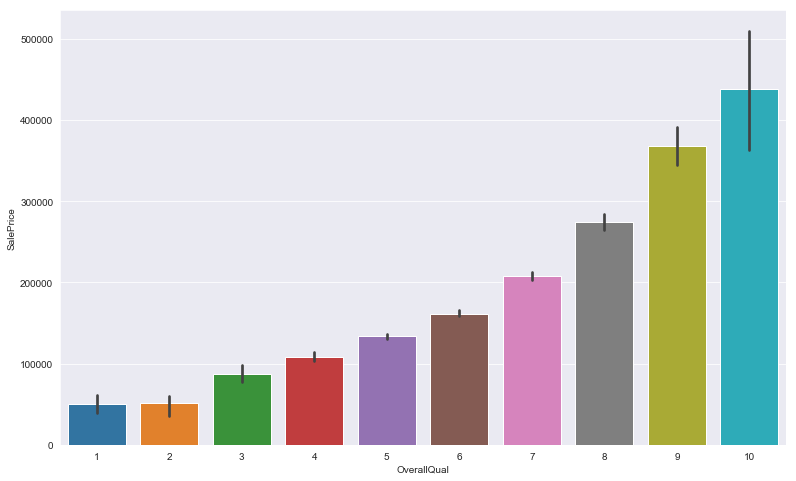

In [41]:
# Relationship with categorical features
plt.figure(figsize=(13,8))
sns.barplot(x=train['OverallQual'], y=train['SalePrice'] )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

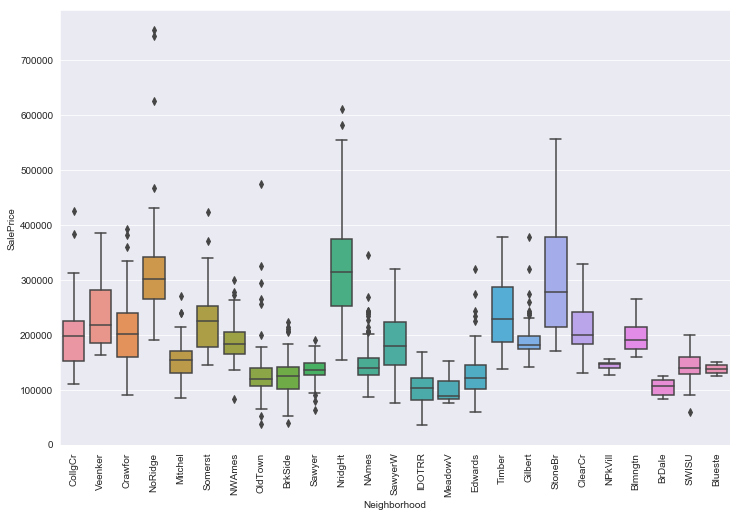

In [42]:
fig,axes=plt.subplots(figsize=(12,8))
fig=sns.boxplot(x=train['Neighborhood'], y=train['SalePrice'])
plt.xticks(rotation=90)

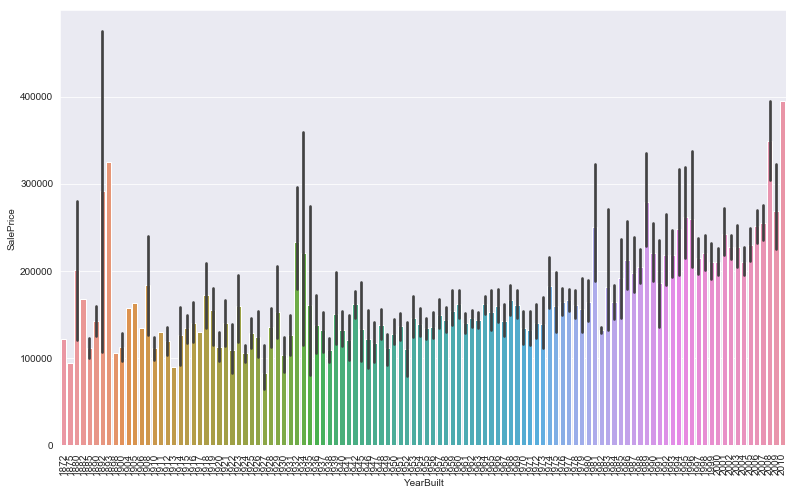

In [43]:
plt.figure(figsize=(13,8))
plt.xticks(rotation=90)
sns.barplot(x=train['YearBuilt'], y=train['SalePrice'] )

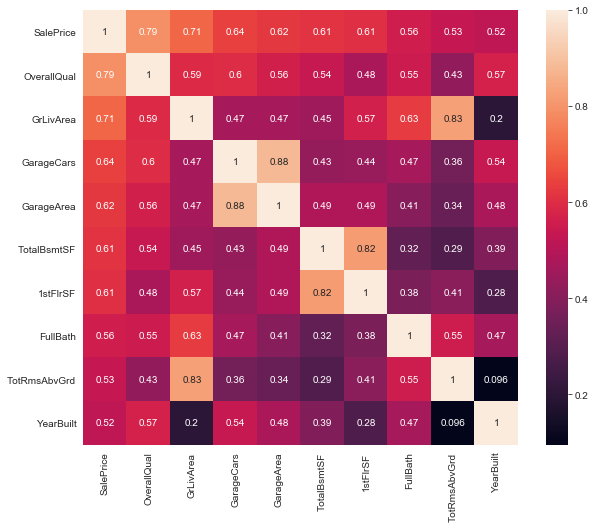

In [44]:
corrmat=train.corr()
plt.figure(figsize=(10,8))
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index #Get the rows of a DataFrame sorted by the n largest values of columns.
cm = np.corrcoef(train[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,  yticklabels=cols.values, xticklabels=cols.values)
plt.show()

1) 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.                                      
2) 'GarageCars' and 'GarageArea' are also strongly correlated variables.

# this big scatter plot gives idea about variables relationships.

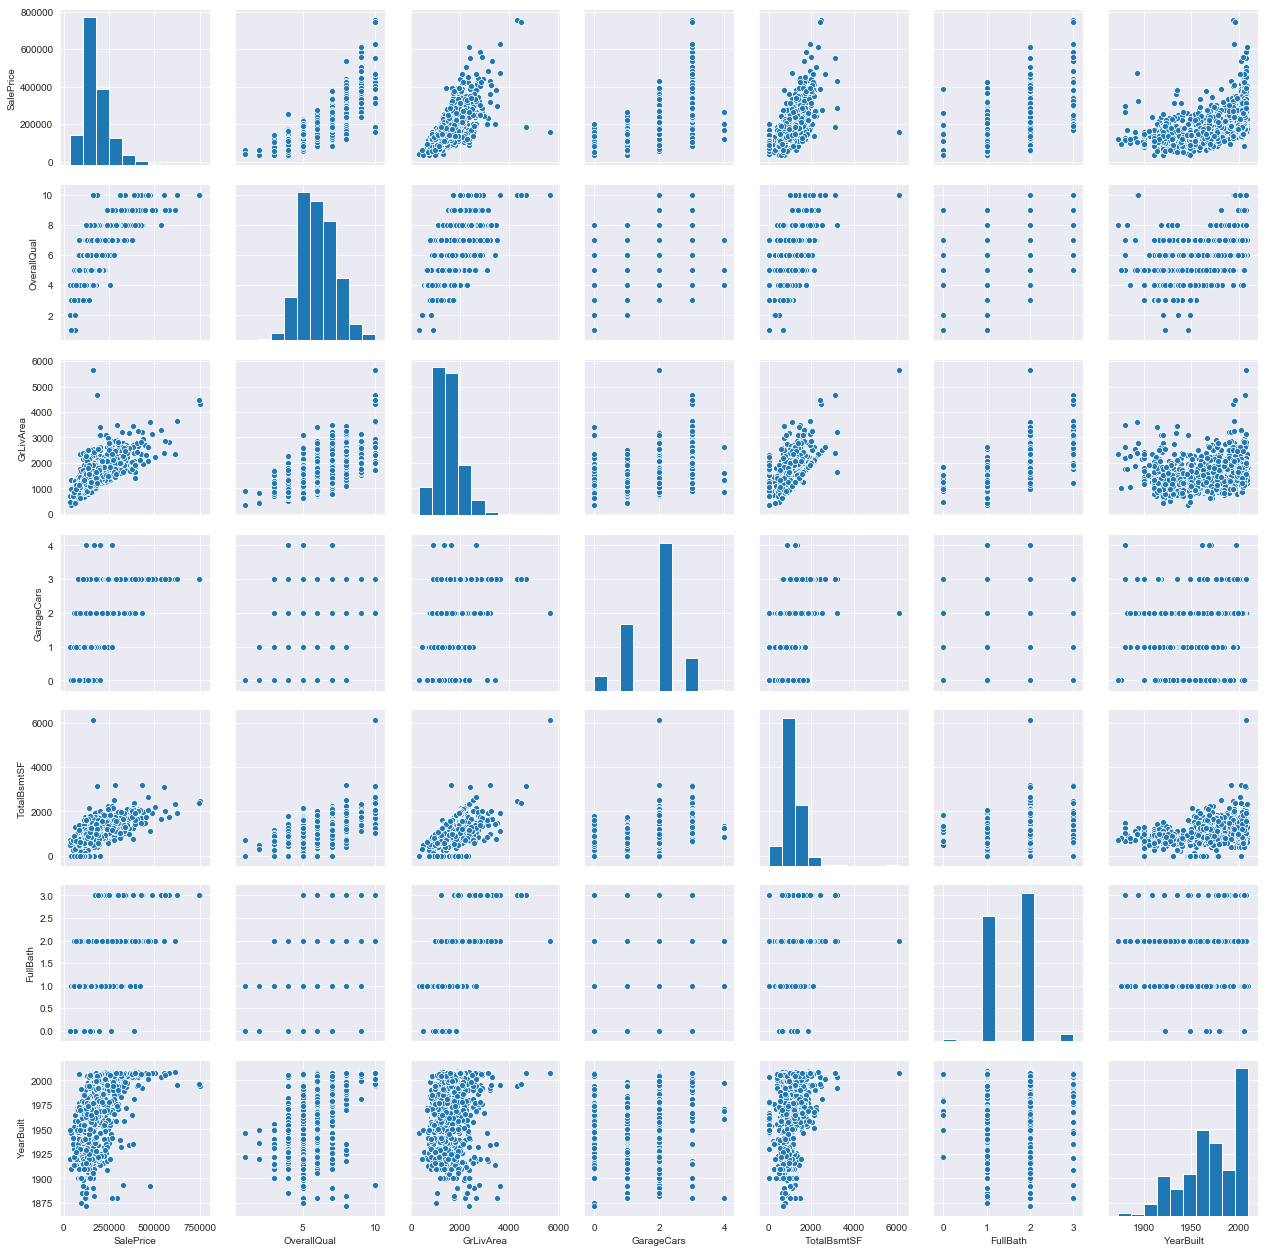

In [45]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height = 2.5)
plt.show()

# DATA PREPROCESSING 

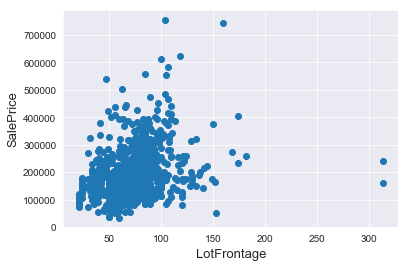

In [46]:
#outilers

plt.scatter(x = train['LotFrontage'], y = train['SalePrice'])
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('LotFrontage', fontsize=13)
plt.show()

We can see at the bottom right two with extremely large LotFrontage that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.                                                                                 
**Note**-Outliers removal is not always safe it can effect our model so, instead of removing all outliers we will make our model 
robust to ouliers.

In [47]:
train[(train['LotFrontage']>300) & (train['SalePrice']<300000)].index

Int64Index([934, 1298], dtype='int64')

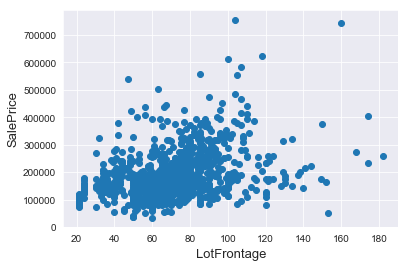

In [48]:
#Deleting outliers
train = train.drop(train[(train['LotFrontage']>300) & (train['SalePrice']<300000)].index)

#Check the graphic again
plt.scatter(x = train['LotFrontage'], y = train['SalePrice'])
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('LotFrontage', fontsize=13)
plt.show()

# Target Variable


 mu 180893.65 and sigma 79451.75 is 


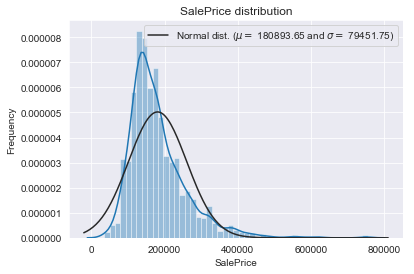

In [49]:
# SalesPrice is the variable we need to predict.Let's explore it 
sns.distplot(train['SalePrice'],fit=norm)

mu,sigma=norm.fit(train['SalePrice'])

print('\n mu {:.2f} and sigma {:.2f} is '.format(mu,sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)], loc='best')

plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.show()

In [50]:
# sale price is right-skewed
print(f"Skewness: {train['SalePrice'].skew()}" )

Skewness: 1.8836087249434306


The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.


 mu 12.02 and sigma 0.40 is 


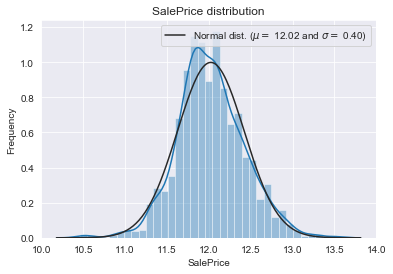

In [51]:
# Log-transformation of the target variable
# we use numpy log1p which applies log(1+x) to all the elements of Coloumn

train['SalePrice']=np.log1p(train['SalePrice'])

sns.distplot(train['SalePrice'],fit=norm)

mu,sigma=norm.fit(train['SalePrice'])
print('\n mu {:.2f} and sigma {:.2f} is '.format(mu,sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)], loc='best')

plt.ylabel('Frequency')
plt.title('SalePrice distribution')


plt.show()


# Feature Enginerring

In [55]:
# concatenate the train and test data in the same dataframe

ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test),sort=True).reset_index(drop=True)

all_data.drop(['SalePrice'], axis=1, inplace=True)

print("all_data size is : {}".format(all_data.shape))
all_data.head()

all_data size is : (2917, 79)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


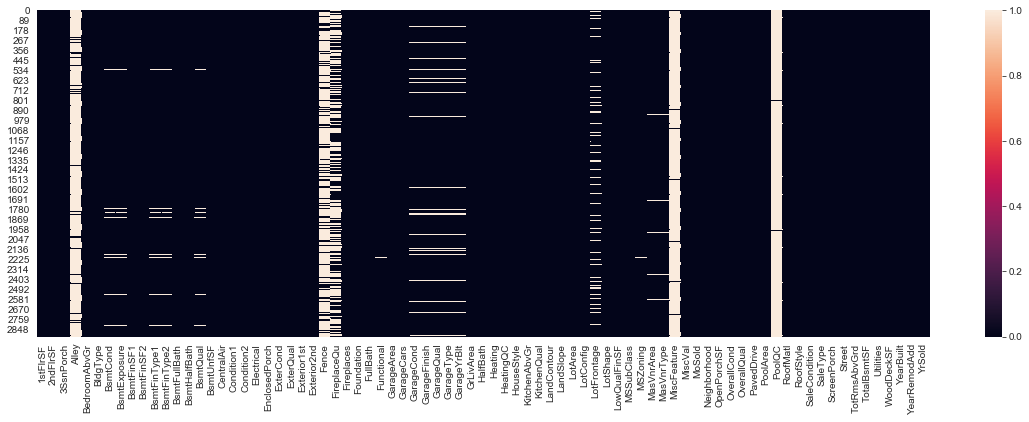

In [56]:
# Missing Data
plt.figure(figsize=(20,6))
sns.heatmap(all_data.isnull())

In [57]:
# calculating percentage of missing data

all_data_na=(all_data.isnull().sum() / len(all_data)) * 100 
all_data_na=all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:34]

missing_data=pd.DataFrame(all_data_na,columns=['Missing Perc.'])
missing_data.sort_values(by='Missing Perc.',ascending=False,inplace=True)
missing_data.head(10)

,Missing Perc.
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageYrBlt,5.450806
GarageFinish,5.450806
GarageCond,5.450806
GarageQual,5.450806


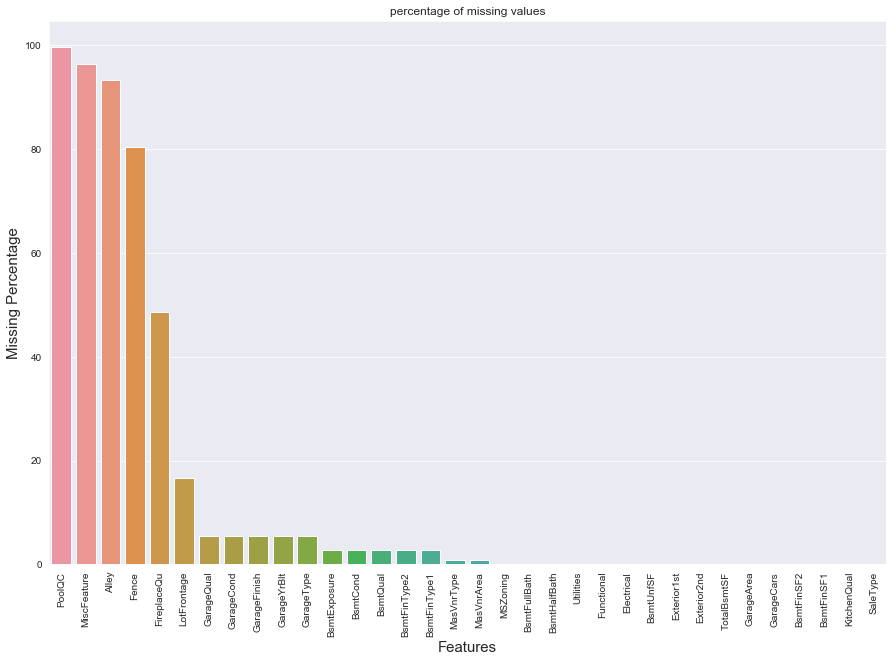

In [58]:
plt.figure(figsize=(15,10))
sns.barplot(x=all_data_na.index,y=missing_data['Missing Perc.'])
plt.xticks(rotation=90)
plt.xlabel('Features',fontsize=15)
plt.ylabel('Missing Percentage',fontsize=15)
plt.title('percentage of missing values')
plt.show()

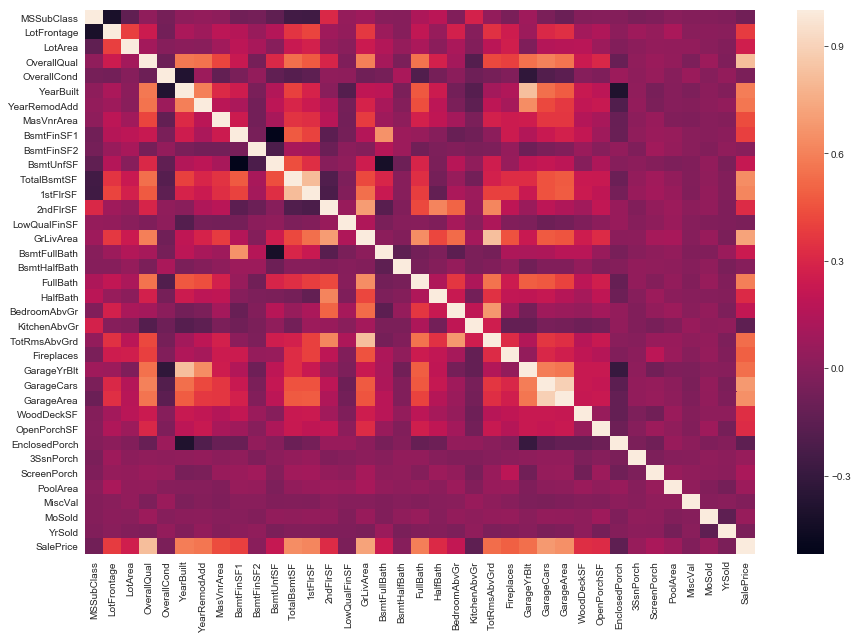

In [59]:
# correlation of different feature with price
corrmat=train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corrmat)

plt.show()

# Imputing missing values


1 **PoolQC** : data descryption has 99% NAN values which makes sense that majority of the houses has NO pool. 

In [60]:
all_data['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [61]:
all_data['PoolQC'].value_counts()

Ex    4
Gd    3
Fa    2
Name: PoolQC, dtype: int64

In [62]:
all_data['PoolQC']=all_data['PoolQC'].fillna('None')

2 **MiscFeatures** : data descryption nan mean no misc features.

In [63]:
all_data['MiscFeature'].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [64]:
all_data['MiscFeature']=all_data['MiscFeature'].fillna('None')

3 **Alley** : data description says NA means "no alley access"

In [65]:
all_data['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [66]:
all_data["Alley"] = all_data["Alley"].fillna("None")

4 **Fence** : data description says NA means "no fence"

In [67]:
all_data['Fence'].value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [68]:
all_data["Fence"] = all_data["Fence"].fillna("None")

5 **FireplaceQu** : data description says NA means "no fireplace"

In [69]:
all_data['FireplaceQu'].value_counts()

Gd    742
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [70]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

6 **LotFrontage** : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood ,we can fill in missing values by the median LotFrontage of the neighborhood.

In [71]:
all_data["LotFrontage"]=all_data.groupby("Neighborhood")['LotFrontage'].apply(lambda x: x.fillna(x.median()))

7 **GarageType, GarageFinish, GarageQual and GarageCond**: Replacing missing data with None

In [72]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

8 **GarageYrBlt, GarageArea and GarageCars**: Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [73]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

9 **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement

In [74]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

10 **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no  basement

In [75]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

11 **MasVnrArea and MasVnrType** : NA most likely means no masonry veneer for these houses. We can fill 0 for the area 
    and None for the type.

In [76]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

12 **MSZoning (The general zoning classification)** : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [77]:
all_data['MSZoning'].value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [78]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

13 **Utilities** : For this feature all records are "AllPub", except for one "NoSeWa".So,this will not be helping us in our prediction. We remove it 

In [79]:
all_data['Utilities'].value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [80]:
all_data = all_data.drop(['Utilities'], axis=1)

14 **Functional**: we fill missing values with most common value typical.

In [81]:
all_data['Functional'].value_counts()

Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [82]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

15 **Electrical** : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

In [83]:
all_data['Electrical'].value_counts()

SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [84]:
all_data['Electrical'] = all_data['Electrical'].fillna('SBrkr')

16 **KitchenQual**: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent)  for the missing value in KitchenQual.

In [85]:
all_data['KitchenQual'].value_counts()

TA    1492
Gd    1150
Ex     204
Fa      70
Name: KitchenQual, dtype: int64

In [86]:
all_data['KitchenQual'].isnull().value_counts()

False    2916
True        1
Name: KitchenQual, dtype: int64

In [87]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna('TA')

17 **Exterior1st and Exterior2nd** : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [88]:
all_data['Exterior1st'].isnull().value_counts()

False    2916
True        1
Name: Exterior1st, dtype: int64

In [89]:
all_data['Exterior2nd'].isnull().value_counts()

False    2916
True        1
Name: Exterior2nd, dtype: int64

In [90]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

18 **SaleType** : Fill in again with most frequent which is "WD"

In [91]:
all_data['SaleType'].isnull().value_counts()

False    2916
True        1
Name: SaleType, dtype: int64

In [92]:
all_data['SaleType'].value_counts()

WD       2524
New       238
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [93]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [94]:
# checking for any missing value
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [95]:
# transforming some numerical values that are really categorial
type(all_data['MSSubClass'][0])

numpy.int64

In [96]:
# MSSubClass=The building class
all_data['MSSubClass']=all_data['MSSubClass'].apply(str)

# Changing OverallCond into a categorical variable
all_data['OverallCond']=all_data['OverallCond'].astype(str)

# Year and month sold are transformed into categorical features.
all_data['YrSold']=all_data['YrSold'].apply(str)
all_data['MoSold']=all_data['MoSold'].apply(str)

In [97]:
# Applying label encoder to categorial values

from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbt=LabelEncoder()
    lbt.fit((all_data[c]))
    lbt.transform((all_data[c]))
    
print('Shape all_data: {}'.format(all_data.shape))
    


Shape all_data: (2917, 78)


# adding more features
 since area of the house is very important to determine the price of house.So, we add one more feature which 
 is the totalarea of the house by combining basement, first and second floor areas of each house.

In [98]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [99]:
# skewed Features
# or normally distributed data, the skewness should be about 0. a skewness value > 0 means that 
# there is more weight in the left tail of the distribution

In [100]:
# skew function for checking skewness in data
skew(all_data['MiscVal'])

21.939672170380096

In [101]:
# check the skewness of all numeric features
numeric_feats= all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.058210
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


# Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .

Note that setting  λ=0  is equivalent to log1p used above for the target variable.                                             
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html

In [102]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 33 skewed numerical features to Box Cox transform


Getting dummies categorial variables

In [103]:
# One-Hot Encoding
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 338)


In [104]:
# getting new training and testing sets
train = all_data[:ntrain]
test = all_data[ntrain:]
all_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'Street_Grvl',
       'Street_Pave', 'YrSold_2006', 'YrSold_2007', 'YrSold_2008',
       'YrSold_2009', 'YrSold_2010'],
      dtype='object', length=338)

# Modelling

In [113]:
from sklearn.linear_model import LinearRegression, Lasso , ElasticNet ,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge #combines ridge regression (linear least squares with l2-norm regularization) with the kernel trick
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler #Scale features using statistics that are robust to outliers
from sklearn.base import BaseEstimator, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error,mean_squared_error
import xgboost as xgb
import lightgbm as lgb # LightGBM is a gradient boosting framework that uses tree based learning algorithms.faster and high accuracy
from sklearn.model_selection import GridSearchCV

In [106]:
# defining cross validation 
# we used cross_val_score of sklearn however it does not have shuffle attribute So, we write a bit of code for that

In [107]:
# validation function
n_folds=5

def rmsle_cv(model):
    kf=KFold(n_splits=n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse=np.sqrt(-cross_val_score(model,X=train.values,y=y_train,scoring="neg_mean_squared_error",cv=kf))
    return rmse
    

# Linear Regression

In [108]:
linear_reg=make_pipeline(RobustScaler(),LinearRegression())

# Lasso Regression 
https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
This model is very sensitive to outliers.So, we use RobustScaler() first in pipeline

In [75]:
# parameter tunning to find best value of alpha
param_grid={'alpha' : [0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5]}

grid=GridSearchCV(Lasso(),param_grid=param_grid,scoring='neg_mean_squared_error',cv=4)
grid.fit(train.values,y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [76]:
grid.best_params_

{'alpha': 0.0005}

In [109]:
lasso=make_pipeline( RobustScaler() , Lasso(alpha= 0.0005, random_state=1))

# Support Vector Machine

In [ ]:
Cs = [0.001, 0.01, 0.1, 1, 10]

gammas = [0.001, 0.01, 0.1, 1]

degree=[2,3,4,5]

param_grid = {'C': Cs, 'gamma' : gammas  , 'degree':degree}

grid=GridSearchCV(SVR(),param_grid=param_grid,cv=5)
grid.fit(train.values,y_train) 

In [ ]:
grid.best_params_

In [78]:
support_vector_machine=make_pipeline( RobustScaler(), SVR(C=10,degree=2,gamma=0.001))

# ElasticNet 
again RobustScaler() is used

In [79]:
ENet = make_pipeline( RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=0.9 ,random_state=3))

# KernalRidge Regressor
Kernel ridge regression (KRR) combines Ridge Regression (linear least squares with l2-norm regularization) with the kernel trick

In [80]:
KRR = KernelRidge(alpha=0.6 , kernel='polynomial', degree=2)

# GradientBoosting Regressor
With **'huber' ** loss it is robust to outliers
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [ ]:
grid_param={'n_estimators':[20,40,100,200,500,1000,3000]}

grid=GridSearchCV(GradientBoostingRegressor(),param_grid=grid_param,cv=4,scoring="neg_mean_squared_error")
grid.fit(train.values,y_train) 

In [ ]:
grid.best_params_

In [81]:
# Its a general thumb-rule to start with square root.
GBoost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05,
                                   max_depth=5, max_features='sqrt', random_state=5)       

# Xgboost

<a href='https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/'>XGBOOST PARAMETER TUNNING</a>

In [82]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603,  n_estimators=2000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             learning_rate=0.05, max_depth=4,
                             random_state =7)

# Lightweight GBM 
LightGBM uses the leaf-wise tree growth algorithm, while many other popular tools use depth-wise tree growth
<a href="https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html">parameter tunning in LGBM</a>

In [83]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=7,
                              learning_rate=0.05, n_estimators=720,
                              bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              min_data_in_leaf =6)

Let us see how the base models performs in cross_validation scores RMSE

In [84]:
score= rmsle_cv(linear_reg)
print(score)
print("\nLinear regression score mean {:.4f} and Std {:.4f}".format(score.mean(),score.std()))

[0.12211113 0.15050104 0.17396054 0.11835562 0.11916492]

Linear regression score mean 0.1368 and Std 0.0221


In [85]:
score= rmsle_cv(lasso)
print(score)
print("\nLasso score mean {:.4f} and Std {:.4f}".format(score.mean(),score.std()))

[0.10327182 0.1357879  0.12711899 0.10576242 0.11306042]

Lasso score mean 0.1170 and Std 0.0125


In [86]:
score= rmsle_cv(support_vector_machine)
print(score)
print("\nLasso score mean {:.4f} and Std {:.4f}".format(score.mean(),score.std()))

[0.1159649  0.14582164 0.12990242 0.11104627 0.12184362]

Lasso score mean 0.1249 and Std 0.0122


In [87]:
score= rmsle_cv(ENet)
print(score)
print("\nElasticNet score mean {:.4f} and Std {:.4f}".format(score.mean(),score.std()))

[0.1034065  0.13545828 0.12760009 0.10566905 0.11300941]

ElasticNet score mean 0.1170 and Std 0.0125


In [88]:
score= rmsle_cv(KRR)
print(score)
print("\nkernalRigdeRegessor score mean {:.4f} and Std {:.4f}".format(score.mean(),score.std()))

[0.11098673 0.14364346 0.12550434 0.112162   0.11820976]

kernalRigdeRegessor score mean 0.1221 and Std 0.0119


In [89]:
score= rmsle_cv(GBoost)
print(score)
print("\nGradientBoosting score mean {:.4f} and Std {:.4f}".format(score.mean(),score.std()))

[0.10976911 0.14391387 0.12707001 0.11460779 0.12009801]

GradientBoosting score mean 0.1231 and Std 0.0119


In [90]:
score= rmsle_cv(model_xgb)
print(score)
print("\nLightweightGradientBoosting score mean {:.4f} and Std {:.4f}".format(score.mean(),score.std()))

[0.11619823 0.14299017 0.12585143 0.11004836 0.12173705]

LightweightGradientBoosting score mean 0.1234 and Std 0.0112


In [91]:
score= rmsle_cv(model_lgb)
print(score)
print("\nLightweightGradientBoosting score mean {:.4f} and Std {:.4f}".format(score.mean(),score.std()))

[0.11013936 0.1442784  0.12818578 0.10711721 0.11467916]

LightweightGradientBoosting score mean 0.1209 and Std 0.0137


# Stacking Models
<a href='http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/'>model stacking</a>


 **simple stacking approach : Averaging the base models **
We build a new **class**  to extend scikit-learn with our model and also code reuse with inheritance.

In [92]:
class AveragingModels(BaseEstimator, RegressorMixin):
    def __init__(self,models):
        self.models=models
        
    # we define the clone of the original model to fit the data in
    def fit(self, X, y):
        self.models_=[clone(x) for x in self.models]
        
        # train the base models
        for model in self.models_:
            model.fit(X,y)
            
        return self
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([ model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)   

In [93]:
# We just average four models here ENet, GBoost, KRR and lasso. but we can add more models in mix.
averaging_models=AveragingModels(models=( ENet, GBoost, KRR,lasso) )

score=rmsle_cv(averaging_models)
print("\naveraging_models score mean {:.4f} and Std {:.4f}".format(score.mean(),score.std()))


averaging_models score mean 0.1146 and Std 0.0124


# Adding meta model

In this approach, we add a meta-model on averaged base models and use the out-of-folds predictions of these base models to train our meta-model.

The procedure, for the training part, may be described as follows:

1) Split the total training set into two disjoint sets (here train and .holdout )

2) Train several base models on the first part (train)

3) Test these base models on the second part (holdout)

4) Use the predictions from 3) (called out-of-folds predictions) as the inputs, and the correct responses (target variable) as the outputs to train a higher level learner called meta-model.

We average the predictions of all base models on the test data and used them as **meta-features** on which, the final prediction is done with the **meta-model**.

In [94]:
class StackingAveragedModels(BaseEstimator, RegressorMixin):
    def __init__(self, base_models ,meta_model,n_folds=5):
        self.base_models=base_models
        self.meta_model=meta_model
        self.n_folds=n_folds
    
    # we again fit the data on the clone of the original models
    def fit(self,X,y):
        self.base_models_= [list() for x in self.base_models]
        self.meta_model_=clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds ,shuffle=True,random_state=158)
        
        # train cloned base model and create out of fold predictions
        # which are used to train meta_model
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        
        for i , model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance=clone(model)
                self.base_models_[i].append(instance)
                instance.fit( X[train_index] ,y[train_index] )
                y_pred= instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index,i]=y_pred
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    
    
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([np.column_stack([model.predict(X) for model in base_models]).mean(axis=1) 
                                         for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [89]:
# stacking average model score
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR), meta_model =lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1141 (0.0129)


we get a better score by adding meta leaners

# Ensembling StackedRegressor, XGBoost and LightGBM
We add XGBoost and LightGBM to the averagemodels.

In [90]:
def rmsle(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))
    

In [91]:
# final training and predictions

In [92]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.0791256867458869


In [93]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.045147341310769605


In [94]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.05404215433551412


In [95]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.06836070313889554


In [96]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [103]:
ensemble[:50]

array([122184.1120674 , 160084.10195004, 187265.62196462, 199603.91859603,
       192890.35669321, 172983.78058772, 178224.09419356, 164102.69616078,
       188435.7149241 , 124019.79673329, 192500.83071818,  96626.56063901,
        96212.82674842, 148132.88548151, 112108.64158098, 377966.72925137,
       247295.93444303, 293779.42176163, 286343.0737798 , 494719.96089362,
       331245.81973698, 208571.96188516, 179685.99243212, 164078.88064613,
       182666.06637429, 195770.50823592, 340271.26029559, 235285.98750576,
       199257.71358153, 239864.23670772, 193169.66500659,  91282.94391884,
       184598.5049996 , 290346.71492808, 287176.610367  , 241276.65531164,
       181159.32513579, 165148.30778944, 160454.58768364, 157842.70477849,
       178294.3013484 , 144833.76819689, 294152.27252343, 239871.46879824,
       227929.98943657, 189011.50086568, 257638.66302457, 199703.80622006,
       160909.46202623, 144950.70425468])

In [97]:
result=pd.DataFrame()
result['Id']=test_id
result['SalePrice']=ensemble
result.to_csv('submission12.csv',index=False)

In [98]:
import pickle
with open('my_dumped_model.pkl', 'wb') as fid:
    pickle.dump(model_lgb, fid) 

In [ ]:
import pickle
with open('my_dumped_model.pkl', 'rb') as fid:
    loaded_model = pickle.load(fid)